In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Final_train_data.csv")
test_data=pd.read_csv("Final_test_data.csv")

In [3]:
data.head()

,Travelling Alone,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age,Fare,relative,Sex_2,Survived
0,0,0,0,1,0,0,1,-0.592481,-0.502445,0.059160,1,0
1,0,1,0,0,1,0,0,0.638789,0.786845,0.059160,0,1
2,1,0,0,1,0,0,1,-0.284663,-0.488854,-0.560975,0,1
3,0,0,0,1,1,0,0,0.407926,0.420730,0.059160,0,1
4,1,0,0,1,0,0,1,0.407926,-0.486337,-0.560975,1,0


In [4]:
X_train=data.drop("Survived",axis=1)
Y_train=data["Survived"]

In [5]:
X_test=test_data.drop("Survived",axis=1)
Y_test=test_data["Survived"]

In [20]:
Accuracy_record={}

In [7]:
from sklearn.metrics import accuracy_score,classification_report

### Applying Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr=LogisticRegression()

In [11]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [13]:
lr_pred=lr.predict(X_test)

In [339]:
k=accuracy_score(Y_test,lr_pred)*100
print(k)

93.77990430622009


In [340]:
Accuracy_record["LR"]=k

In [16]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.90      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.93       418
weighted avg       0.94      0.94      0.94       418



#### Applying KNN CLassifer

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
accuracy=[]
max_n=0
max_acc=0
knn_pred=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i,metric = 'minkowski', p = 1)
    knn.fit(X_train,Y_train)
    knn_pred=knn.predict(X_test)
    z=accuracy_score(Y_test,knn_pred)*100
    if(z>max_acc):
        max_acc=z
        max_n=i
    accuracy.append(z)

In [51]:
print(max_acc,max_n)

85.16746411483254 6


In [52]:
accuracy

[73.68421052631578,
 79.42583732057416,
 83.01435406698565,
 84.688995215311,
 83.73205741626795,
 85.16746411483254,
 83.97129186602871,
 83.97129186602871,
 84.21052631578947,
 83.73205741626795,
 84.21052631578947,
 84.21052631578947,
 84.21052631578947,
 83.73205741626795,
 84.688995215311,
 83.73205741626795,
 82.77511961722487,
 85.16746411483254,
 84.21052631578947]

In [46]:
Accuracy_record["KNN"]=max_acc

### SVM

In [90]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [99]:
svm=SVC(kernel='rbf')

In [102]:
svm.fit(X_train,Y_train)

SVC()

In [66]:
from sklearn.model_selection import cross_val_score

In [100]:
scores=cross_val_score(svm,X_train,Y_train,cv=5)

In [96]:
scores

array([0.82681564, 0.82022472, 0.79775281, 0.80337079, 0.87078652])

In [104]:
k=svm.score(X_test,Y_test)*100
k

93.77990430622009

In [105]:
Accuracy_record["SVM"]=k

### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
Dt= DecisionTreeClassifier(max_depth=9,min_samples_leaf=11,max_features=6)

In [225]:
Dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=11)

In [226]:
dt_pred=Dt.predict(X_test)

In [228]:
k=accuracy_score(Y_test,dt_pred)*100
k

91.6267942583732

In [229]:
Accuracy_record["DT"]=k

### Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf=RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [267]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [272]:
cv.cv_results_

{'mean_fit_time': array([0.00937996, 0.01216736, 0.05026546, 0.0941484 , 0.23637567,
        0.00637989, 0.01116581, 0.05107079, 0.09913049, 0.24692702,
        0.00698128, 0.01236677, 0.05505285, 0.1105051 , 0.27287426,
        0.00738869, 0.01374784, 0.06342459, 0.11688075, 0.31037693,
        0.00757961, 0.013762  , 0.06263223, 0.12186699, 0.30597706,
        0.00738029, 0.01336241, 0.06083746, 0.131846  , 0.29981155]),
 'std_fit_time': array([0.00099401, 0.00146557, 0.00149305, 0.00079787, 0.00374002,
        0.00049073, 0.00040119, 0.00039644, 0.00048509, 0.00135223,
        0.00063075, 0.00048871, 0.00039895, 0.00039899, 0.00232753,
        0.00048059, 0.00040847, 0.00239689, 0.00246141, 0.02231766,
        0.00079789, 0.00039959, 0.00074607, 0.00249007, 0.01686906,
        0.00048858, 0.00049019, 0.0006309 , 0.01093269, 0.00780329]),
 'mean_score_time': array([0.00299459, 0.00220094, 0.00498028, 0.00897584, 0.02074418,
        0.00159769, 0.00199442, 0.00517941, 0.00897665, 0.02

In [274]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=10)

In [281]:
cv.best_score_

0.819327098110602

In [276]:
rft=RandomForestClassifier(max_depth=8,n_estimators=10)

In [277]:
rft.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, n_estimators=10)

In [283]:
k=rft.score(X_test,Y_test)*100
k

84.21052631578947

In [284]:
Accuracy_record["RFC"]=k

### Plotting and Comparison b/w models

In [285]:
import seaborn as sns

In [288]:
import matplotlib.pyplot as plt

In [332]:
color=["Blue","Red","Green","Black","Grey"]

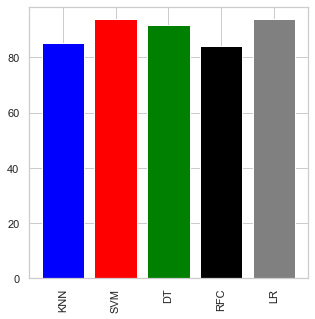

In [351]:
plt.figure(figsize=(5, 5))
plt.bar(range(len(Accuracy_record)), values,color=color,edgecolor="whit")
plt.xticks(range(len(Accuracy_record)),x,rotation="vertical")
plt.show()

In [347]:
x=list(Accuracy_record.keys())

In [348]:
values=list(Accuracy_record.values())

In [349]:
values

[85.16746411483254,
 93.77990430622009,
 91.6267942583732,
 84.21052631578947,
 93.77990430622009]

In [346]:
del Accuracy_record["Logisic Regression"]